In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from football_sim import *
plt.rcParams['figure.figsize']=[16,9]

In [2]:
urls = {'EN': 'http://www.football-data.co.uk/mmz4281/1718/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1718/SP1.csv',
                          'IT': 'http://www.football-data.co.uk/mmz4281/1718/I1.csv',
                          'FR': 'http://www.football-data.co.uk/mmz4281/1718/F1.csv',
                          'DE': 'http://www.football-data.co.uk/mmz4281/1718/D1.csv',
                          'NL': 'http://www.football-data.co.uk/mmz4281/1718/N1.csv'
                          }
urls = {'EN': 'http://www.football-data.co.uk/mmz4281/1718/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1718/SP1.csv'
                          }


In [3]:
all_data=get_data(urls)

In [4]:
all_data['EN'].tail(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG
255,03/02/18,Man United,Huddersfield,2,0
256,03/02/18,West Brom,Southampton,2,3
257,04/02/18,Crystal Palace,Newcastle,1,1
258,04/02/18,Liverpool,Tottenham,2,2
259,05/02/18,Watford,Chelsea,4,1


In [5]:
teams = create_teams(all_data)

In [6]:
teams=calibrate(teams,all_data)

In [7]:
EnglishTeams={x:teams[x] for x in teams if teams[x].country=='EN'}
PremierLeague=Season(EnglishTeams)
PremierLeague.process_current_results(all_data['EN'])
PremierLeague.simulate_season(n_scenarios=100000)

In [8]:
PremierLeague.season_report()

simulation not yet processed, processing


,Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Man City,98.0,92.0,103.0,1.0,1.0,99.96,100.00,2.27,0.19,0.00
Man United,79.5,73.0,86.0,4.0,2.0,0.04,95.90,1.27,0.14,0.00
Liverpool,78.1,71.0,84.0,5.0,2.0,0.00,93.85,1.69,0.28,0.00
Tottenham,73.7,67.0,80.0,6.0,2.0,0.00,68.85,1.37,0.20,0.00
Chelsea,71.3,64.0,78.0,6.0,3.0,0.00,35.15,1.09,0.24,0.00
Arsenal,66.1,59.0,73.0,6.0,4.0,0.00,6.25,1.35,0.58,0.00
Burnley,54.7,48.0,62.0,9.0,7.0,0.00,0.00,0.34,0.16,0.00
Leicester,53.2,46.0,60.0,10.0,7.0,0.00,0.00,0.87,0.57,0.00
Watford,45.4,38.0,53.0,15.0,8.0,0.00,0.00,0.91,0.93,0.54
Bournemouth,45.4,39.0,53.0,14.0,8.0,0.00,0.00,0.62,0.73,0.38


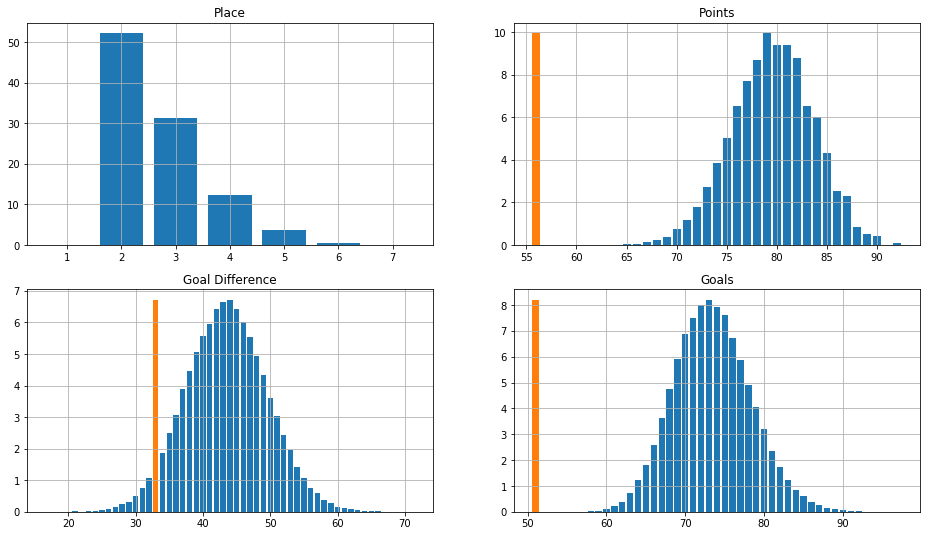

In [9]:
PremierLeague.team_report('Man United')

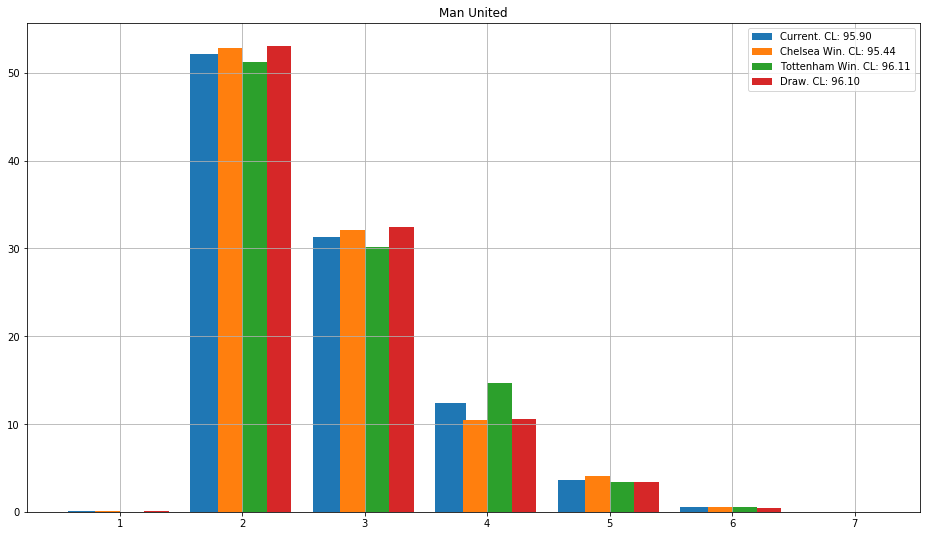

In [10]:
PremierLeague.what_if('Chelsea v Tottenham',ref_team='Man United')

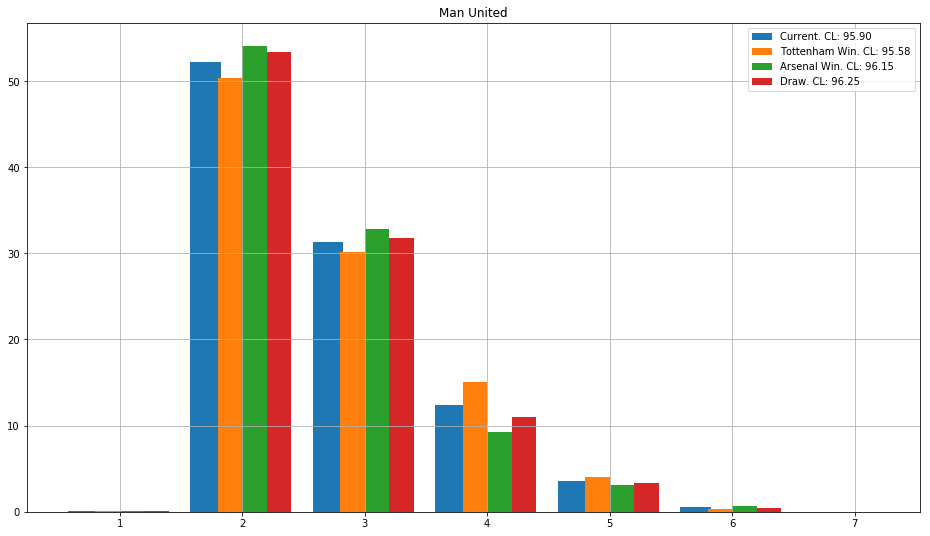

In [11]:
PremierLeague.what_if('Tottenham v Arsenal',ref_team='Man United')

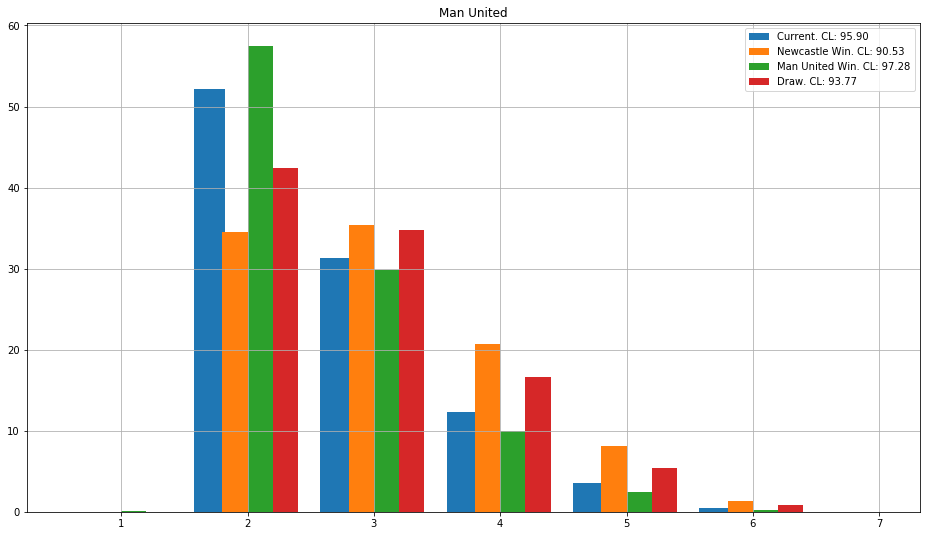

In [12]:
PremierLeague.what_if('Newcastle v Man United',ref_team='Man United')

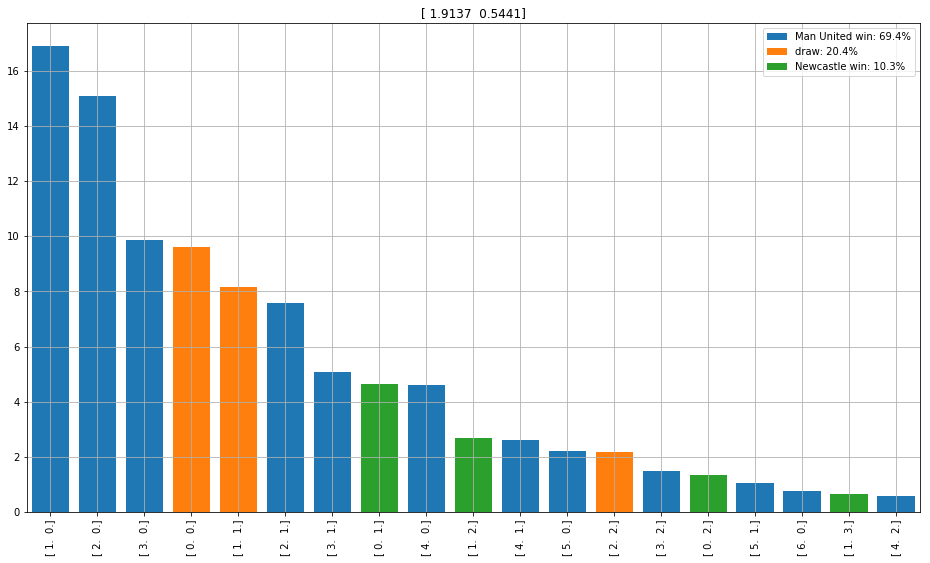

In [24]:
teams['Man United']+teams['Newcastle']

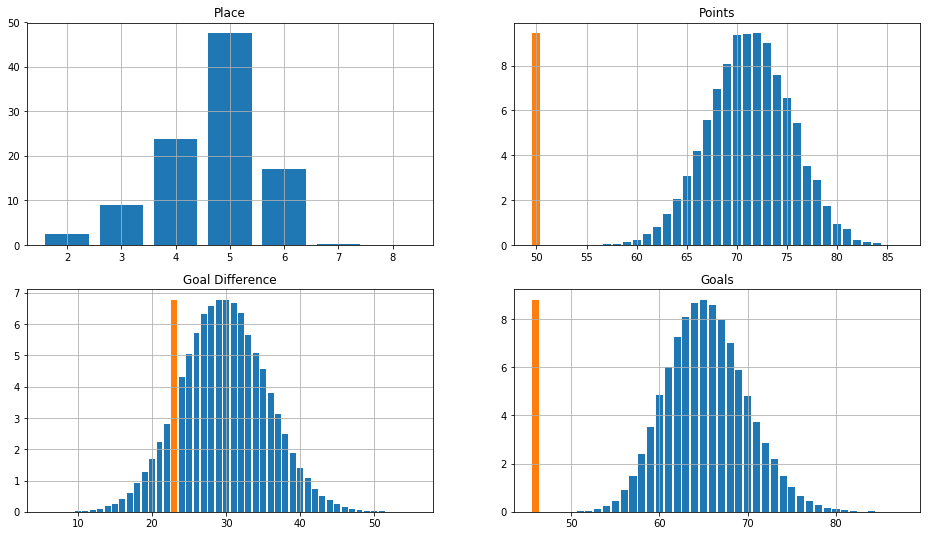

In [14]:
PremierLeague.team_report('Chelsea')

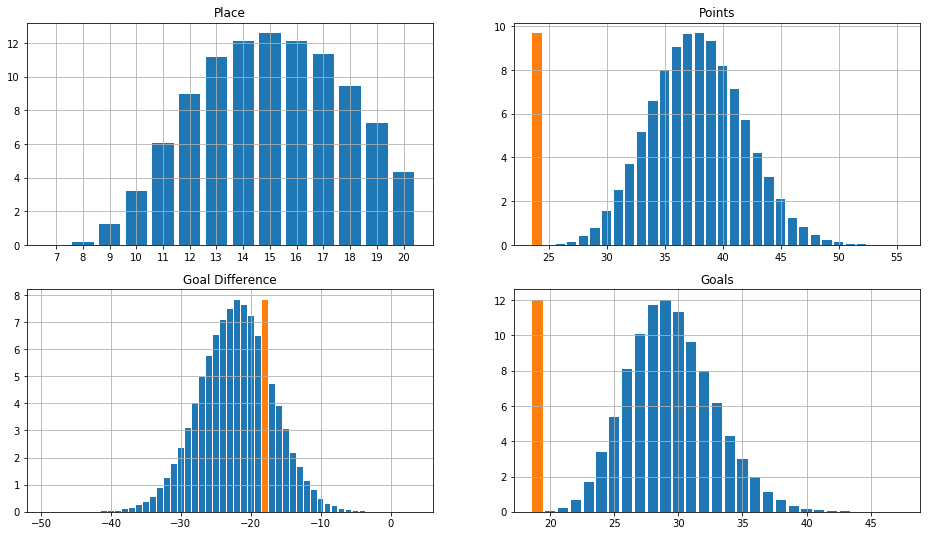

In [15]:
PremierLeague.team_report('Swansea')

In [16]:
TeamSet={x:teams[x] for x in teams if teams[x].means()[0]>=1 and teams[x].country=='EN'}
#GoodTeams={x:teams[x] for x in teams if teams[x].means()[0]>=1.2}

In [17]:
CustomLeague=Season(TeamSet,nr_cl=2,nr_degr=1)
CustomLeague.process_current_results(all_data['EN'])
CustomLeague.process_current_results(all_data['ES'])
CustomLeague.process_current_results(all_data['DE'])
CustomLeague.process_current_results(all_data['NL'])
CustomLeague.process_current_results(all_data['FR'])
CustomLeague.process_current_results(all_data['IT'])
CustomLeague.simulate_season(n_scenarios=100000)

KeyError: 'DE'

In [ ]:
CustomLeague.team_report('Man United')

In [ ]:
CustomLeague.team_report('Man City')

In [ ]:
CustomLeague.season_report()

In [ ]:
SpanishTeams={x:teams[x] for x in teams if teams[x].country=='ES'}
LaLiga=Season(SpanishTeams)
LaLiga.process_current_results(all_data['ES'])
LaLiga.simulate_season(n_scenarios=100000)

In [ ]:
LaLiga.season_report()

In [ ]:
LaLiga.team_report('Real Madrid')

In [ ]:
LaLiga.team_report('Barcelona')